#**Most Streamed Spotify Songs 2023**
**Introduction**

In this project, we will look at most streamed songs on Spotify in 2023 dataset with details of each columns in the dataset as below:

* track_name: Name of the song
* artist(s)_name: Name of the artist(s) of the song
* artist_count: Number of artists contributing to the song
* released_year: Year when the song was released
* released_month: Month when the song was released
* released_day: Day of the month when the song was released
* in_spotify_playlists: Number of Spotify playlists the song is included in
* in_spotify_charts: Presence and rank of the song on Spotify charts
* streams: Total number of streams on Spotify
* in_apple_playlists: Number of Apple Music playlists the song is included in
* in_apple_charts: Presence and rank of the song on Apple Music charts
* in_deezer_playlists: Number of Deezer playlists the song is included in
* in_deezer_charts: Presence and rank of the song on Deezer charts
* in_shazam_charts: Presence and rank of the song on Shazam charts
* bpm: Beats per minute, a measure of song tempo
* key: Key of the song
* mode: Mode of the song (major or minor)
* danceability_%: Percentage indicating how suitable the song is for dancing
* valence_%: Positivity of the song's musical content
* energy_%: Perceived energy level of the song
* acousticness_%: Amount of acoustic sound in the song
* instrumentalness_%: Amount of instrumental content in the song
* liveness_%: Presence of live performance elements
* speechiness_%: Amount of spoken words in the song

**Objective: In this project, we will find out**

1. Top streamed songs.
2. Top artists base on number of their top songs on Spotify and base on their total streams.
3. Relationship of data of a top song on different song charts and playlists.
4. Relationship between different background elements in a top song.
5. Trends and preferences in top songs.

First, let's import some basic libraries used for processing data and visualisation.

In [ ]:
import pandas as pd                     # for working with dataset
import matplotlib.pyplot as plt         # for visualization
import seaborn as sns                   # for visualization
import plotly.express as px             # for visualization

### **I. DATA EXPLORATION**

In [ ]:
sp = pd.read_csv('/content/drive/MyDrive/spotify-2023.csv')
sp.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
sp.duplicated().sum()

0

>There is no duplicated data in the dataset.

We will create a date column which include data of day, month, year that the song was release and convert this column type to datetime data type. After that, we will drop the original day and month columns because we have the date column now.

In [ ]:
sp['released_year']=sp['released_year'].apply(str)
sp['released_month']=sp['released_month'].apply(str)
sp['released_day']=sp['released_day'].apply(str)
sp['date'] = sp['released_year'] + '-' + sp['released_month'] + '-' + sp['released_day']
sp['date'] = pd.to_datetime(sp['date'])

In [ ]:
sp.drop(['released_month', 'released_day'],axis=1,inplace = True)

Let's inspect the data again.

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artist(s)_name        953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   released_year         953 non-null    object        
 4   in_spotify_playlists  953 non-null    int64         
 5   in_spotify_charts     953 non-null    int64         
 6   streams               953 non-null    object        
 7   in_apple_playlists    953 non-null    int64         
 8   in_apple_charts       953 non-null    int64         
 9   in_deezer_playlists   953 non-null    object        
 10  in_deezer_charts      953 non-null    int64         
 11  in_shazam_charts      903 non-null    object        
 12  bpm                   953 non-null    int64         
 13  key                 

>The streams, in_deezer_playlists and in_shazam_charts columns should have integer data type instead of object type. Let's inspect if there is any row in these column is in the incorrect format before changing these column to integer type.


In [ ]:
sp[pd.to_numeric(sp['streams'], errors='coerce').isnull()]

,track_name,artist(s)_name,artist_count,released_year,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,date
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,0,54,...,A,Major,53,75,69,7,0,17,3,1970-01-01


In [ ]:
sp[pd.to_numeric(sp['in_deezer_playlists'], errors='coerce').isnull()].in_deezer_playlists


48     2,445
54     3,394
55     3,421
65     4,053
73     1,056
       ...  
761    2,453
762    2,430
871    6,720
893    1,315
910    7,827
Name: in_deezer_playlists, Length: 79, dtype: object

In [ ]:
sp[pd.to_numeric(sp['in_shazam_charts'], errors='coerce').isnull()].in_shazam_charts

12     1,021
13     1,281
14       NaN
17     1,173
24     1,093
44     1,133
54       NaN
55       NaN
71       NaN
73       NaN
86       NaN
88     1,451
89     1,170
127      NaN
158      NaN
159      NaN
180      NaN
243      NaN
274      NaN
320      NaN
392      NaN
395      NaN
403      NaN
410      NaN
429      NaN
434      NaN
440      NaN
441      NaN
442      NaN
443      NaN
444      NaN
446      NaN
449      NaN
500      NaN
501      NaN
504      NaN
506      NaN
507      NaN
513      NaN
518      NaN
519      NaN
520      NaN
529      NaN
531      NaN
532      NaN
533      NaN
534      NaN
535      NaN
549      NaN
554      NaN
560      NaN
566      NaN
584      NaN
620      NaN
625      NaN
727      NaN
927      NaN
Name: in_shazam_charts, dtype: object

>For the streams column, the row with index 574 has error in the streams value, let's fill this row with the current stream of the song that is showed on Spotify.

>For the in_the_deezer_playlists column, let's remove the comma in rows with incorrect format.

>We will also remove the comma which makes the format of data in in_shazam_charts column incorrect.

In [ ]:
sp.loc[574,'streams']=204973630
sp['in_deezer_playlists']=sp['in_deezer_playlists'].str.replace(',','')
sp['in_shazam_charts']=sp['in_shazam_charts'].str.replace(',','')

Now let's change the data type of these column to integer and replace the NaN value in in_shazam_charts column with 0 value. After that, let's inspect the data again.

In [ ]:
sp['released_year'] = sp['released_year'].astype(int)
sp['streams'] = sp['streams'].astype(int)
sp['in_deezer_playlists']=sp['in_deezer_playlists'].astype(int)
sp['in_shazam_charts'] = sp['in_shazam_charts'].fillna(0).astype(int)
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artist(s)_name        953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   released_year         953 non-null    int64         
 4   in_spotify_playlists  953 non-null    int64         
 5   in_spotify_charts     953 non-null    int64         
 6   streams               953 non-null    int64         
 7   in_apple_playlists    953 non-null    int64         
 8   in_apple_charts       953 non-null    int64         
 9   in_deezer_playlists   953 non-null    int64         
 10  in_deezer_charts      953 non-null    int64         
 11  in_shazam_charts      953 non-null    int64         
 12  bpm                   953 non-null    int64         
 13  key                 

Now we have the dataset with 23 columns, let's check if there is any missing value in the dataset.

In [ ]:
sp.isnull().sum()/len(sp)*100

track_name              0.00000
artist(s)_name          0.00000
artist_count            0.00000
released_year           0.00000
in_spotify_playlists    0.00000
in_spotify_charts       0.00000
streams                 0.00000
in_apple_playlists      0.00000
in_apple_charts         0.00000
in_deezer_playlists     0.00000
in_deezer_charts        0.00000
in_shazam_charts        0.00000
bpm                     0.00000
key                     9.96852
mode                    0.00000
danceability_%          0.00000
valence_%               0.00000
energy_%                0.00000
acousticness_%          0.00000
instrumentalness_%      0.00000
liveness_%              0.00000
speechiness_%           0.00000
date                    0.00000
dtype: float64

There is about 10% value of key data is missing in the dataset, there was NaN value in the in_shazam_charts column but they were replaced with 0 in the previous step.

Let's get some quick statistics about this dataset.


In [ ]:
sp.describe()

,artist_count,released_year,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,5200.124869,12.009444,5.138130e+08,67.812172,51.908709,385.187828,2.666317,56.847849,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,7897.608990,19.575992,5.666477e+08,86.441493,50.630241,1130.535561,6.035599,157.441749,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,875.000000,0.000000,1.417210e+08,13.000000,7.000000,13.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,2224.000000,3.000000,2.902286e+08,34.000000,38.000000,44.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,5542.000000,16.000000,6.738011e+08,88.000000,87.000000,164.000000,2.000000,33.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


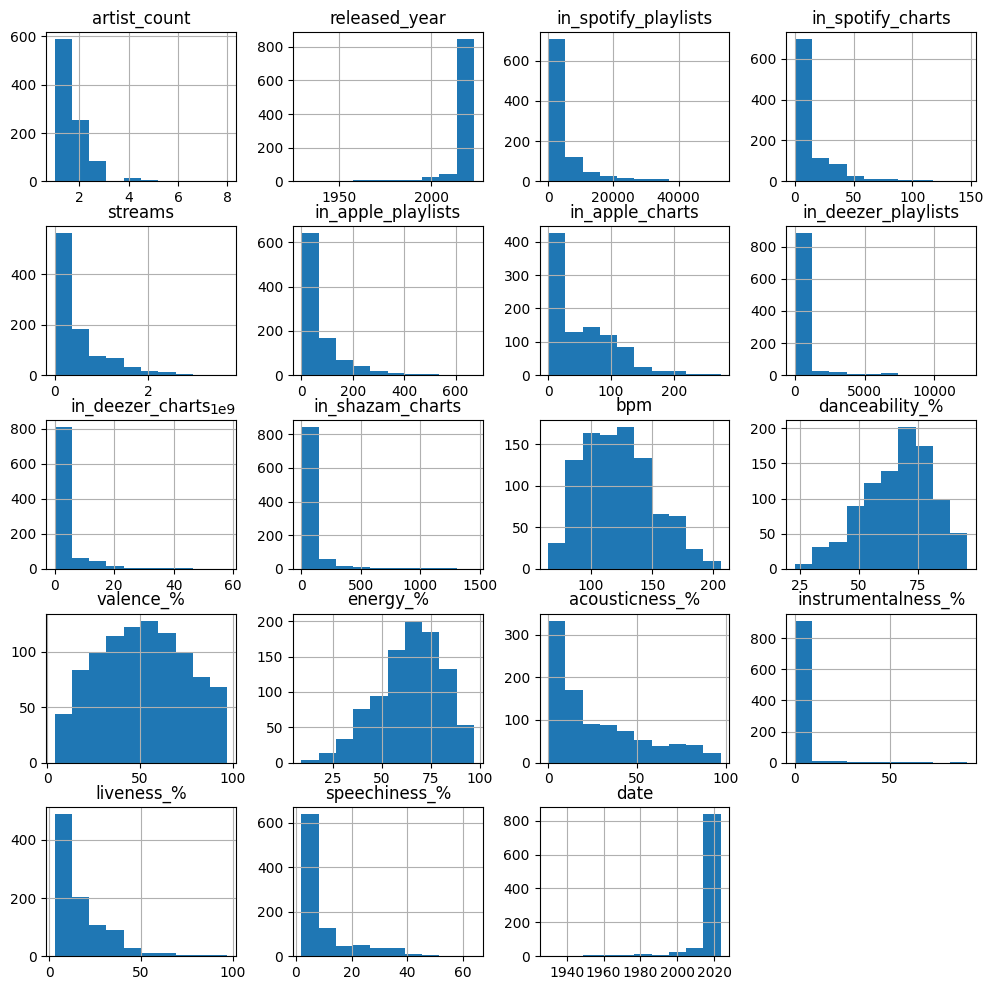

In [ ]:
sp.hist(figsize = (12,12))
plt.show()

### **II.DATA  VISUALIZATION**

Let's get top 10 artists bases on the total number of songs they have on Spotify top songs.

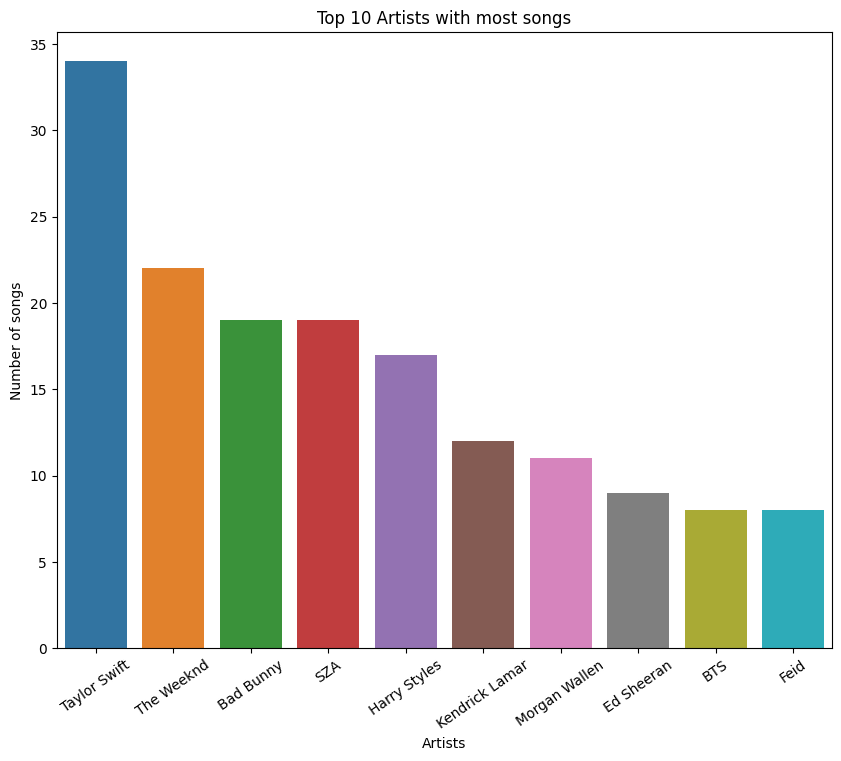

In [ ]:
top_10_artists_with_most_songs = sp['artist(s)_name'].value_counts().head(10) #get top 10 artists

# Visualize using bar chart
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_artists_with_most_songs.index, y=top_10_artists_with_most_songs.values)
plt.title('Top 10 Artists with most songs')
plt.xlabel('Artists')
plt.ylabel('Number of songs')
plt.xticks(rotation=35)
plt.show()

In [ ]:
print('Top 10 Artist with most Songs on Spotify Top Streamed Songs''\n',top_10_artists_with_most_songs)

Top 10 Artist with most Songs on Spotify Top Streamed Songs
 Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: artist(s)_name, dtype: int64


Let's get top 10 artists bases on the total streams of each artist.





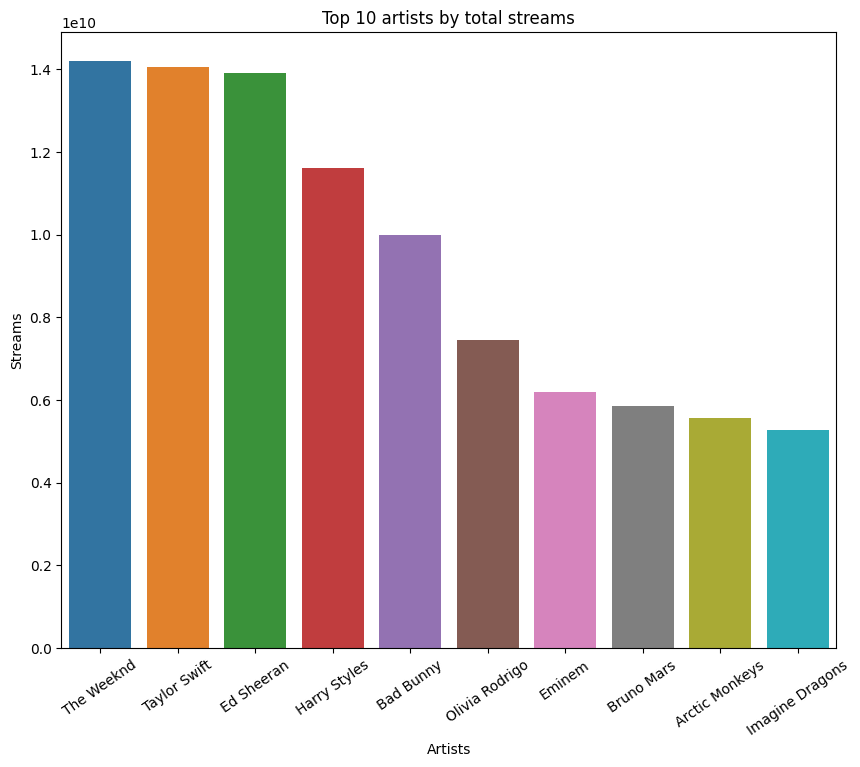

In [ ]:
top_10_artists = sp.groupby(by=sp['artist(s)_name'])['streams'].sum().sort_values(ascending=False).head(10) #get top 10 artists

# Visualize using bar chart
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_artists.index, y=top_10_artists.values)
plt.title('Top 10 artists by total streams')
plt.xlabel('Artists')
plt.ylabel('Streams')
plt.xticks(rotation=35)
plt.show()

In [ ]:
top_10_artists

artist(s)_name
The Weeknd         14185552870
Taylor Swift       14053658300
Ed Sheeran         13908947204
Harry Styles       11608645649
Bad Bunny           9997799607
Olivia Rodrigo      7442148916
Eminem              6183805596
Bruno Mars          5846920599
Arctic Monkeys      5569806731
Imagine Dragons     5272484650
Name: streams, dtype: int64

Let's get top 10 songs bases on their streams.

In [ ]:
top_10_songs = sp.nlargest(10, 'streams') #get top 10 songs

# Visualize using bar chart
fig = px.bar(top_10_songs,x='track_name', y='streams', title='Top 10 Songs by Streams')
fig.show()

Now let's see in what mode that top songs are made with.

Major    57.712487
Minor    42.287513
Name: mode, dtype: float64

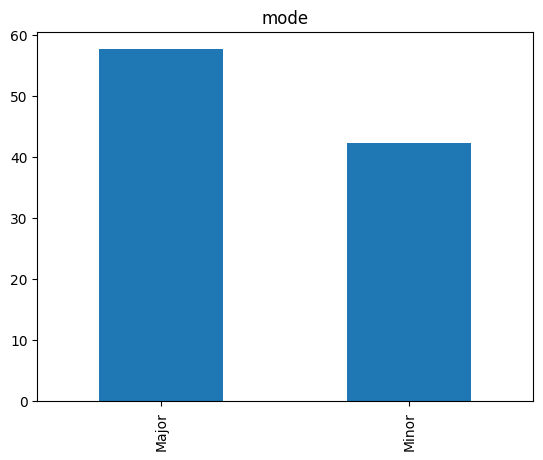

In [ ]:
mode=sp['mode'].value_counts()/len(sp)*100
mode.plot.bar()
plt.title('mode')
mode

>The majority of songs are in major mode (nearly 60%).

Let's see how keys are distributed among tops songs on Spotify.

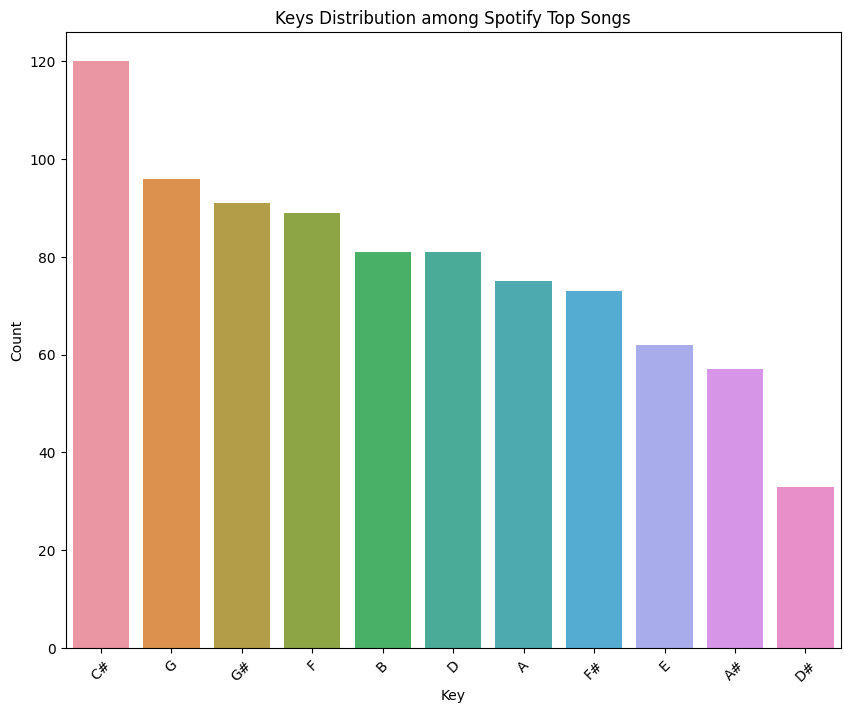

In [ ]:
key_distribution = sp.key.value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=key_distribution.index, y=key_distribution.values)
plt.title('Keys Distribution among Spotify Top Songs')
plt.xlabel('Key')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
key_distribution

C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: key, dtype: int64

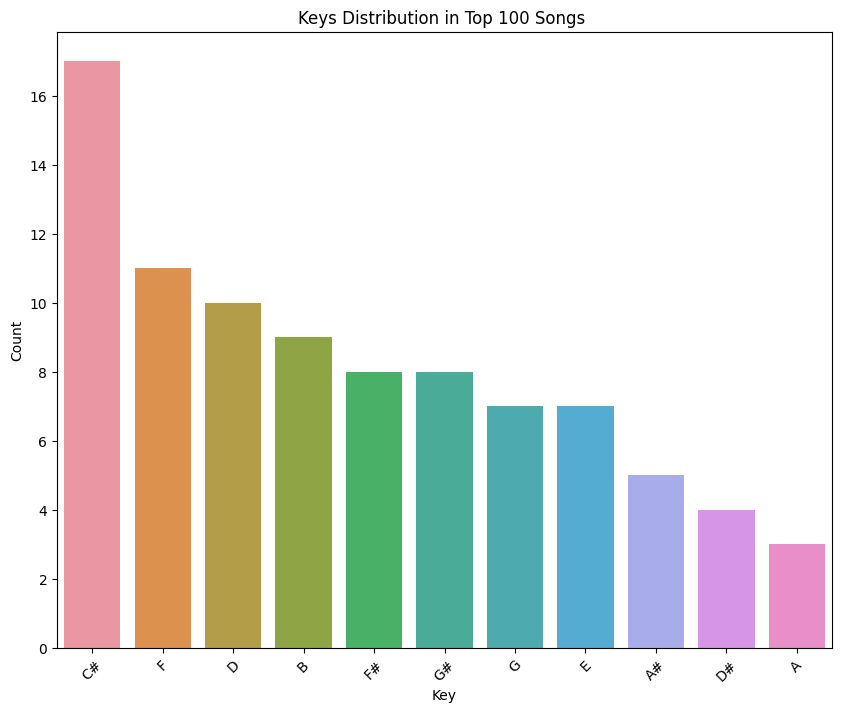

In [ ]:
top_100_songs = sp.nlargest(100, 'streams')
key_100 = top_100_songs.key.value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=key_100.index, y=key_100.values)
plt.title('Keys Distribution in Top 100 Songs ')
plt.xlabel('Key')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

>As can be from both graphs, most top songs was written with C# key. Also, F key and B key are also frequently used in songs with most streams on Spotify.

Next, let's see how a song performs on different charts and playlists affect its streams.


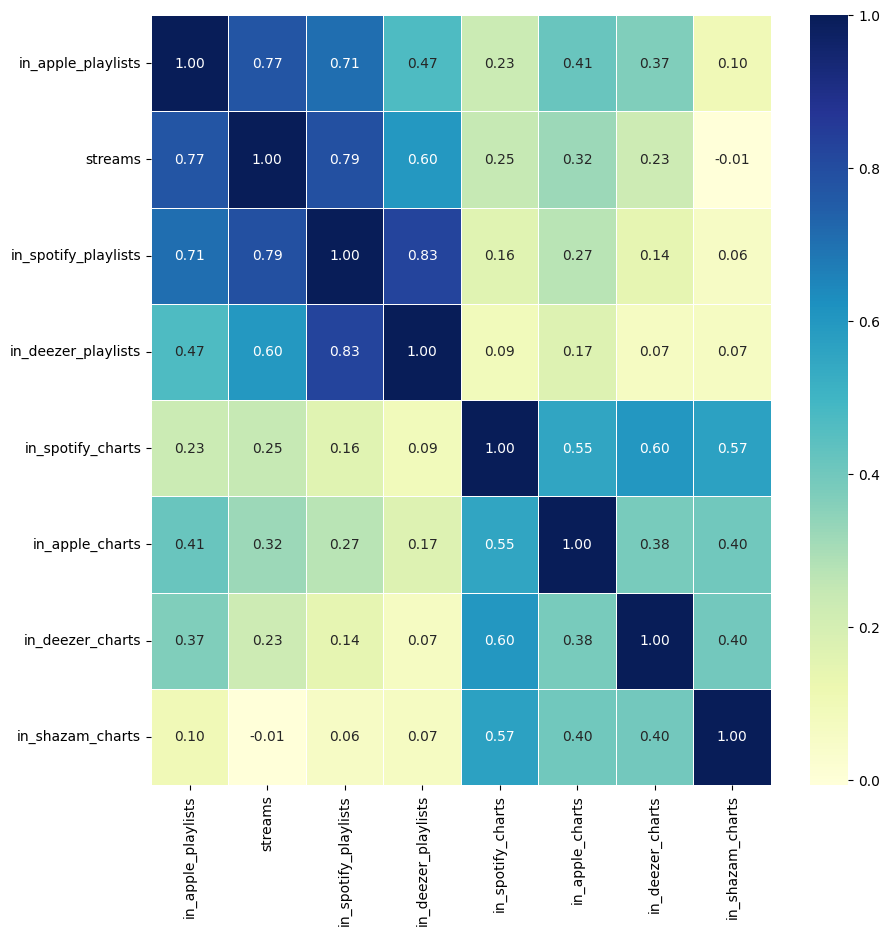

In [ ]:
chart_playlist = ['in_apple_playlists', 'streams', 'in_spotify_playlists', 'in_deezer_playlists', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']
fig, ax = plt.subplots(figsize=(10,10))
cm = sns.heatmap(sp[chart_playlist].corr(), linewidths = .5, cmap="YlGnBu", annot=True, ax=ax, fmt='.2f')
plt.show()

>There is correlation between songs in spotify playlists, songs in apple playlists and songs in deezer playlists together with the streams of those songs.

>Similarly, songs appear on spotify charts and on other charts include apple music charts, deezer charts and shazam charts are slightly correlated in the heatmap.

>It can be said that the more playlists that a song is in, the bigger number of streams that song will likely have.
Also, if a song is doing well on one music chart, it is likely that they also do well on others charts.

Let's move on exploring how background elements of top songs contribute to a song's success.

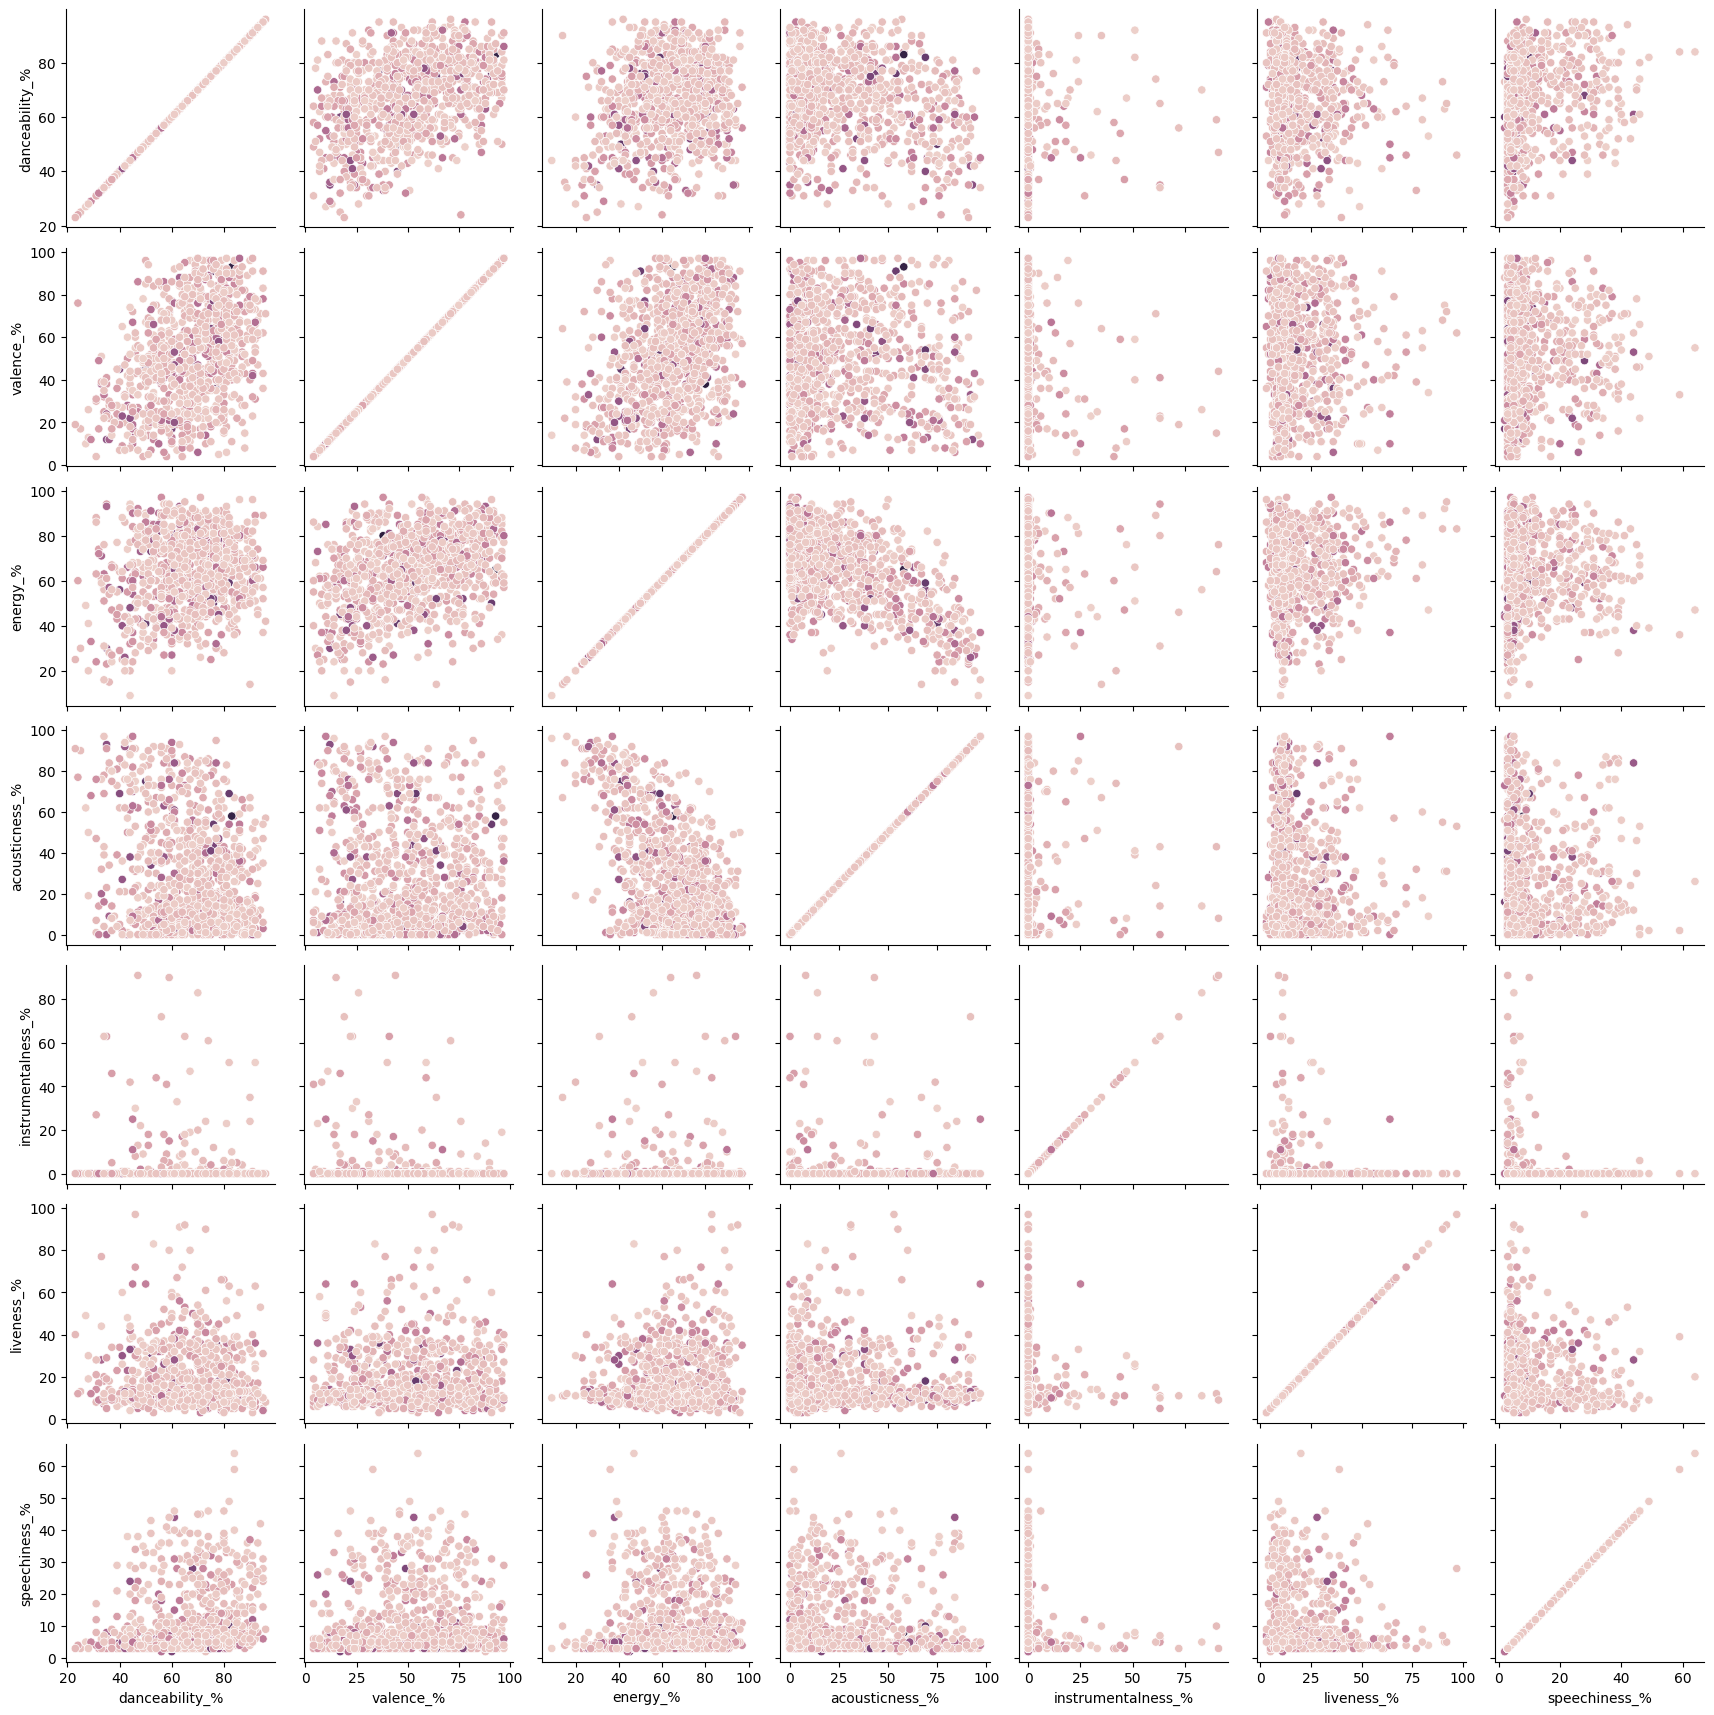

In [ ]:
g = sns.PairGrid(sp, vars=['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], hue="streams")
g.map(sns.scatterplot)
plt.show()

It can be seen that there are strong relationships between danceability, valence and energy in a song. On the other hand, the rest elements include acousticness, strumentalness, liveness and speechiness do not related much to other background elements in a song, especially instrumentalness.

Also, let's see the variance of songs' bpm vs acousticness over the period.

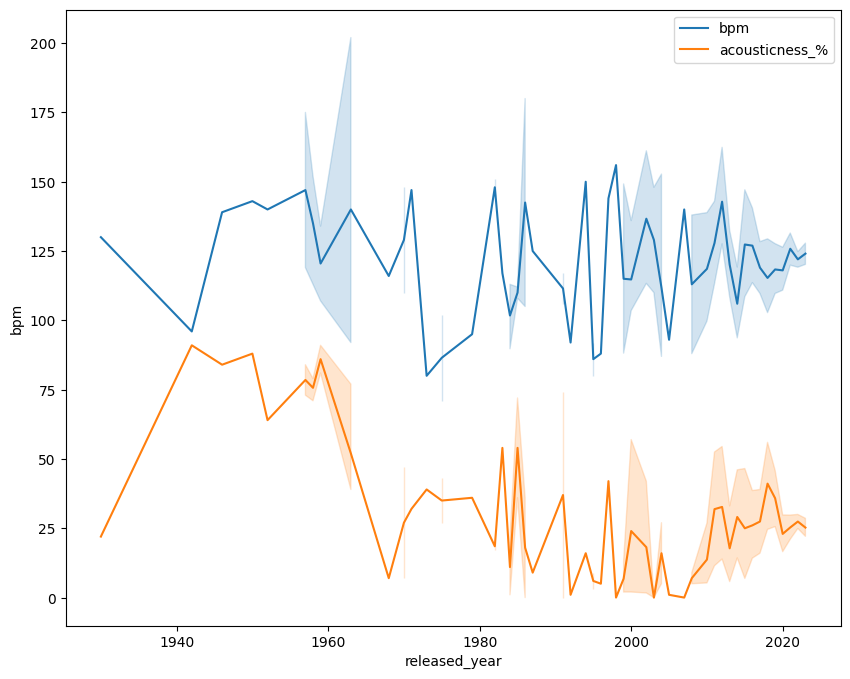

In [ ]:
plt.figure(figsize=(10, 8))
sns.lineplot(data = sp, x = 'released_year', y = 'bpm', label = 'bpm')
sns.lineplot(data = sp, x = 'released_year', y = 'acousticness_%', label = 'acousticness_%')
plt.show()

>It is an intersting fact that over the year, top songs bpm and acousticness mostly have opposite trends to each other. This is easily understandable since songs with more acoustic sound are often have lower bpm. While back the the old day, people prefer songs with more acoustic sound (from 1940 to 1960, the acousticness was varied around 75% in a song), recently, the amount of acoustic sound in a song is not a significant factor in song making that dominating the music industry anymore (only around 25%).

>Top songs on spotify that were released in previous decades had substantially varied bpm. However, in the recent decade until now, most top song had a constant bpm varied around 120-125 beats per minute.

Finally, let's look at the total streams of top songs on Spotify base on the year they were released.

In [ ]:
total_streams = sp.groupby('released_year')['streams'].sum()
fig = px.bar(total_streams,x=total_streams.index, y=total_streams.values, title='Total Streams each Year')
fig.show()

>Since Spotify appeared in 2006, it has quickly dominated the music streaming market. From the graph, it can easily be seen that songs that were released in the recent decade until now have more streams on Spotify compare to songs released before that. And the introduction of Spotify is the reason. Up to now, songs released in 2022 had the most streams with more than 116 billion streams in total, follow by 2021 with nearly 79 billion streams in total.

## **Thank you for your attention**